In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
print("loading training data")
DATA_TRAIN_PATH = '../data/train.csv'
y, raw_X, ids = load_csv_data(DATA_TRAIN_PATH)

print("loading test data")
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

loading training data
loading test data


In [3]:
def process_outliers(x, train):
    """process outliers in the train or test data set according to the distribution of train data set"""
    for i in range(x.shape[1]):
        col = train[:, i]
        std_dev = col.std()
        mean = col.mean()
        x[:, i][np.where((x[:,i] - mean) > 3 * std_dev)] = mean + 3 * std_dev
        x[:, i][np.where((mean - x[:,i]) > 3 * std_dev)] = mean - 3 * std_dev

    return x

# tX = process_outliers(tX, tX)
# tX_test = process_outliers(tX_test, tX)

## Data analysis and preprocessing

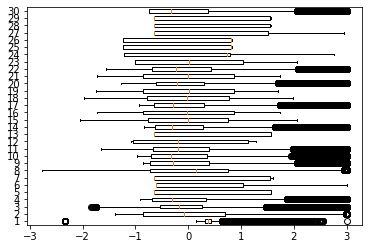

In [56]:
plt.boxplot(tX, vert=False)
plt.savefig("before_preprocessing")
plt.show()

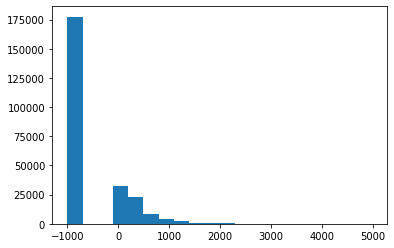

In [38]:
plt.hist(raw_X[:,5], bins=20)
plt.show()

In [4]:
def analyze_missing_values(x):
    # features that have meaningless "-999" values
    missing_cols = []
    drop_cols = []
    replace_cols = []
    ratios = []
    N = x.shape[0]
    D = x.shape[1]
    # print("feature ID\t missing value ratio")
    for i in  range(D):
        if -999 in x[:, i]:
            ratio = len(x[x[:,i]==-999]) / N
            if ratio > 0.5:
                drop_cols.append(i)
            else:
                replace_cols.append(i)
            # print("{}\t {}".format(i, ratio))
            missing_cols.append(i)
            ratios.append(ratio)

    print("need to drop: {}".format(drop_cols))
    print("need to replace: {}".format(replace_cols))
    return drop_cols, replace_cols

print("analyzing training data")
DROP_COLS, REPLACE_COLS = analyze_missing_values(raw_X)

analyzing training data
need to drop: [4, 5, 6, 12, 26, 27, 28]
need to replace: [0, 23, 24, 25]


In [5]:
DROP_COLS = [4, 5, 6, 12, 26, 27, 28]
REPLACE_COLS = [0, 23, 24, 25]

def process_missing(x, replace_cols, drop_cols):
    # replace -999 in replaced_cols
    x[x == -999] = np.nan
    for i in REPLACE_COLS:
        x[:, i][np.isnan(x[:,i])] = np.nanmedian(x[:,i])

    # drop droped_cols
    D = x.shape[1]
    idx = np.setdiff1d(np.arange(D), DROP_COLS)
    x = x[:, idx]

    print("dropped: {}".format(DROP_COLS))
    print("replaced: {}".format(REPLACE_COLS))
    print("final shape of X: {}".format(x.shape))
    return x

raw_X = process_missing(raw_X, REPLACE_COLS, DROP_COLS)
tX_test = process_missing(tX_test, REPLACE_COLS, DROP_COLS)

dropped: [4, 5, 6, 12, 26, 27, 28]
replaced: [0, 23, 24, 25]
final shape of X: (250000, 23)
dropped: [4, 5, 6, 12, 26, 27, 28]
replaced: [0, 23, 24, 25]
final shape of X: (568238, 23)


In [11]:
# # is it a good idea to just remove the data points with missing values?
# higgs_jetnum = pd.DataFrame({"label": df.Prediction, "jet_num": df.PRI_jet_num})
# higgs_jetnum.label = higgs_jetnum.label.where(higgs_jetnum.label=='s', 0)
# higgs_jetnum.label = higgs_jetnum.label.where(higgs_jetnum.label==0, 1)
# g = higgs_jetnum.groupby('jet_num').label
# g.agg(
#     total="count",
#     higgs_count=lambda x: x[x==1].sum(),
#     ratio=lambda x: x[x==1].sum() / x.count())

In [12]:
# import seaborn as sns
# # distribution of each feature
# features = df.loc[:,"DER_mass_MMC":]
# # features = features - features.mean()
# # features = features/features.std()
# ax = sns.boxplot(data=features, orient='h')

In [6]:
def correlation_analysis(x):
    
    #Store the matrix shape in variables
    N, M = x.shape
    
    #Store the attribute names in an array
    #attribute_names = np.asarray(x[:, 1:])

    #generate a matrix used to store highly correlated features' correlation coefficients
    #if the value in the matrix remains zero, features are not highly correlated
    correlation_matrix_high=np.zeros((M,M)) #

    #Compute the correlation matrices for our features
    for i in range(0,M):   
        for j in range(i,M):
            correlation=round(np.corrcoef(x[:,i], x[:,j])[0,1],2)
            #“For descriptive purposes, the relationship will be described as strong if 
            #|r|≥.8, moderate if .5<|r|<.8, and weak if |r|≤.5.” 
            #– Devore and Berk, Modern Mathematical Statistics with Applications, 2012
            if abs(correlation) > 0.8 and abs(correlation) < 1 :
                correlation_matrix_high[i,j]=correlation
                print("features {} and {} are highly correlated with correlation={}\n".format(i, j, correlation))
                
    return 


#function to drop features
def drop_features(x, drop_cols):
    D = x.shape[1]
    idx = np.setdiff1d(np.arange(D), drop_cols)
    x = x[:, idx]
    
    return x

def process_outliers(x):
    for i in range(x.shape[1]):
        col = x[:, i]
        std_dev = col.std()
        mean = col.mean()
        x[:,i][np.where((col - mean) > 3 * std_dev)] = mean + 3 * std_dev
        x[:,i][np.where((mean - col) > 3 * std_dev)] = mean - 3 * std_dev

    return x


#PCA
def compute_pca(X):

    Mu=np.mean(X,1)#ou 1 je sais plus
    one_full=np.ones((np.size(X,0),np.size(X,1)))
    Mu=Mu.reshape(-1,1)
    Mu_big=Mu*one_full
    X=X-Mu_big
    M=np.size(X, 1)
    C = 1/(M-1)*(X@X.T)

    (EigenValues,EigenVectors)=np.linalg.eig(C) #cree pas la variable
    EigenValues=EigenValues.reshape(len(EigenVectors),1)
    print("EVal")
    print(np.shape(EigenValues))
    print("EVect")
    print(np.shape(EigenVectors))
# comp
    #idx=np.argsort(EVal, axis=0)
    
    #idx=np.flip(idx)
    
    #EVal=np.flip(EVal)
    
    #EVect=np.hstack(EVect[:,idx]).T

 #need to reverse
    idx=np.argsort(EigenValues, axis=0)
    print("idx")
    print(np.shape(idx))
    print(idx)
    idx=np.flip(idx, axis=0)
    print("idx sort")
    print(np.shape(idx))
    print(idx)
    EigenValues=np.hstack(EigenValues[idx,:]).T
    EigenVectors=np.hstack(EigenVectors[:,idx]).T
    print("shape V")
    print(np.shape(EigenVectors))  
    return Mu, C, EigenVectors, EigenValues

def project_pca(X, Mu, V, p):
    
    one_full=np.ones((np.size(X,0),np.size(X,1)))
    Mu_big=Mu*one_full

    X=X-Mu_big

    V=V[:,1:p]
    Ap=V.T
    Y=Ap@X

    return Y, Ap

def explained_variance(EigenValues, var_threshold):


    ExpVar=EigenValues/sum(EigenValues)
    CumVar=np.cumsum(ExpVar)
    for i in range (np.size(EigenValues)):
        p_opt=i
        if CumVar[i]>=var_threshold:
            break

    return ExpVar, CumVar, p_opt

#Polynomial feature expansion of degree 2
def feature_expansion(x):
    indices = np.triu_indices(x.shape[1]) #triangular matrices indices
    x_poly  = np.multiply(x[:, indices[0]], x[:, indices[1]]) #multiply the elements with triangular indices
    return x_poly

# correlation
# correlation_analysis(raw_X)
# correlation_analysis(tX_test)

raw_X = drop_features(raw_X, [6])
tX_test = drop_features(tX_test, [6])

print("\n")

correlation_analysis(raw_X)
correlation_analysis(tX_test)

# outliers
raw_X = process_outliers(raw_X)
tX_test = process_outliers(tX_test)

# standardize
raw_X = standardize(raw_X)[0]
tX_test = standardize(tX_test)[0]

# # PCA
# Mu, C, V, EigenValues=compute_pca(raw_X.T)
# Y, Ap = project_pca(raw_X.T, Mu, V, 7)
# ExpVar, CumVar, p_opt=explained_variance(EigenValues, 0.8)
# raw_X = Ap @ raw_X.T 
# tX_test =  Ap @ tX_test.T

# # expand features by degree of 2
# tX_poly = feature_expansion(raw_X)
# tX_poly_test = feature_expansion(tX_test)

# build polynomial basis without combination terms
tX_poly = build_poly(raw_X, 10)
# tX_poly_test = build_poly(tX_test, 3)

# add shift
tX_poly = add_shift(tX_poly)        
# tX_poly_test = add_shift(tX_poly_test)
N = tX_poly.shape[0]
D = tX_poly.shape[1]
print("{} data points, {} features in train set".format(N, D))
# print("{} data points, {} features in test set".format(tX_poly_test.shape[0], tX_poly_test.shape[1]))

# process y for logistic regression
# map y from (-1, 1) to (0,1)
y_log = y.copy()
y_log[np.where(y_log==-1)] = 0




features 0 and 2 are highly correlated with correlation=0.81

features 3 and 21 are highly correlated with correlation=0.81

features 16 and 21 are highly correlated with correlation=0.88

features 0 and 2 are highly correlated with correlation=0.81

features 3 and 21 are highly correlated with correlation=0.81

features 16 and 21 are highly correlated with correlation=0.89

250000 data points, 221 features in train set


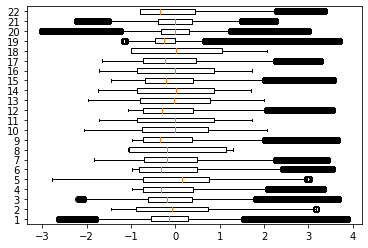

In [6]:
# TODO detect exp distribution
plt.boxplot(raw_X, vert=False)
plt.show()

In [36]:
# from itertools import combinations
# x = np.arange(6).reshape(2,3)
# px = np.vstack([x[:,i] * x[:, j] for i,j in combinations(range(x.shape[1]), 2)]).T
# np.hstack([x, px])

## Training
available functions: linear_sgd, least_square, ridge_regression, learning_by_newton_method, logistic_regression_penalized_gradient_descent
### linear regression with SGD

In [110]:
loss_tr, loss_te, accr = cv_eval(y, tX_poly, 5, linear_sgd, islinear=True, max_iters=10000, gamma=0.01)
print(accr)

Begin training on fold 0
SGD (100/10000): loss=0.11714274721895625
SGD (200/10000): loss=21.824272845217585
SGD (300/10000): loss=7.635008785965252
SGD (400/10000): loss=4.090926476365818
SGD (500/10000): loss=20.169550650405245
SGD (600/10000): loss=20.84122388896153
SGD (700/10000): loss=110.42994530133129
SGD (800/10000): loss=0.3512064592410609
SGD (900/10000): loss=28.54088189920368
SGD (1000/10000): loss=530.6365874139418
SGD (1100/10000): loss=49.018857498204206
SGD (1200/10000): loss=0.1680427505296039
SGD (1300/10000): loss=4.096971296587841
SGD (1400/10000): loss=2.7748056052842354
SGD (1500/10000): loss=0.1394999177648943
SGD (1600/10000): loss=2.5825263578437907
SGD (1700/10000): loss=136.75347324479728
SGD (1800/10000): loss=31.440664998464882
SGD (1900/10000): loss=2.8751313692281273
SGD (2000/10000): loss=1.2301216708884266
SGD (2100/10000): loss=120.0525962134513
SGD (2200/10000): loss=119.9320716390568
SGD (2300/10000): loss=23.290094327134657
SGD (2400/10000): loss=4.

### Ridge regression

In [63]:
tr_losses = []
te_losses = []
accrs = []
para_range = np.logspace(-5, 10, 5)
k_fold = 5 
for lambda_ in para_range:
    tr_ls, te_ls, accr = cv_eval(y, tX_deg10, k_fold, ridge_regression, islinear=True, lambda_=lambda_)
    tr_losses.append(tr_ls)
    te_losses.append(te_ls)
    accrs.append(accr)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(para_range, tr_losses, 'o-', label='train loss')
ax1.plot(para_range, te_losses, 'o-', label='test loss')
ax2.plot(para_range, accrs, 'o-', label='accuracy', color='r')
ax1.set_xscale('log')

plt.title('optimization on lambda for ridge regression')
ax1.set_xlabel('lambda')
ax2.set_ylabel('accuracy', color='r')
ax1.set_ylabel('loss')
ax1.legend(loc='center right')
# ax2.legend()
plt.savefig("CV_lambda_ridge")
plt.show()

## Least Squares

In [62]:
tr_losses = []
te_losses = []
accrs = []
para_range = np.arange(10,11)
k_fold = 3
for degree in para_range:
    print("degree {}".format(degree))
    tX_polyexp = build_poly(raw_X, degree)
    tX_polyexp = add_shift(tX_polyexp)
    tr_ls, te_ls, accr = cv_eval(y, tX_polyexp, k_fold, least_square, islinear=True)
    tr_losses.append(tr_ls)
    te_losses.append(te_ls)
    accrs.append(accr)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(para_range, tr_losses, 'o-', label='train loss')
ax1.plot(para_range, te_losses, 'o-', label='test loss')
ax2.plot(para_range, accrs, 'o-', label='accuracy', color='r')
# ax1.set_xscale('log')

plt.title('optimization on degree for least square')
ax1.set_xlabel('degree of polynomial')
ax2.set_ylabel('accuracy', color='r')
ax1.set_ylabel('loss')
ax1.legend(loc='center right')
# ax2.legend()
plt.savefig("CV_deg_lst")
plt.show()

degree 10


KeyboardInterrupt: 

In [59]:
accrs

[0.7074239999999999,
 0.711344,
 0.73662,
 0.739044,
 0.748132,
 0.750208,
 0.752232,
 0.7536400000000001,
 0.754128,
 0.74612,
 0.7141399999999999,
 0.6864519999999998,
 0.679064]

In [52]:
tX_comb = feature_expansion(raw_X)
tX_comb = add_shift(tX_comb)

tr_ls, te_ls, accr = cv_eval(y, tX_comb, 5, least_square, islinear=True)
print(accr)

0.687848


In [8]:
tr_ls, te_ls, accr = cv_eval(y, tX_poly, 5, least_square, islinear=True)
print(accr)

0.754128


best parameter for least square: polynomial = 10 which is better than combination

In [54]:
tX_deg10 = build_poly(raw_X, 10)
tX_deg10 = add_shift(tX_deg10)
tX_deg10_test = build_poly(tX_test, 10)
tX_deg10_test = add_shift(tX_deg10_test)
w_opt_lst = least_square(y, tX_deg10)

### Cross validation with redge regression

Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with degree: 1
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with degree: 2
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with degree: 3
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with degree: 4
Lowest test loss achieved with degree 4
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with lambda: 0.0001
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with lambda: 0.0002782559402207126
Finsh training on fold 0
Finsh training on fold 1
Finsh training on fold 2
Finsh training on fold 3
Cross validation with lambda: 0.00077426368

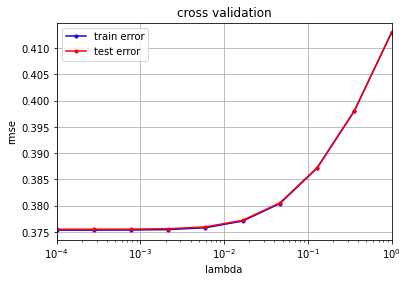

In [81]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    # get k'th subgroup in test, others in train:
    x_te = x[k_indices[k]]
    y_te = y[k_indices[k]]
    # print('test x shape:{}, test y shape:{}'.format(x_te.shape, y_te.shape))
    k_fold = k_indices.shape[0]
    tr_fold = np.r_[np.arange(0, k), np.arange(k+1, k_fold)]
    x_tr = x[k_indices[tr_fold].flatten()]
    y_tr = y[k_indices[tr_fold].flatten()]
    # print('train x shape:{}, train y shape:{}'.format(x_tr.shape, y_tr.shape))

    # form data with polynomial degree
    px_tr = build_poly(x_tr, degree)
    px_te = build_poly(x_te, degree)

    # ridge regression
    w = ridge_regression(y_tr, px_tr, lambda_)

    # calculate the loss for train and test data
    mse_tr = compute_mse(y_tr, px_tr, w)
    mse_te = compute_mse(y_te, px_te, w)
    loss_tr =  np.sqrt(2 * mse_tr)
    loss_te = np.sqrt(2 * mse_te)

    return loss_tr, loss_te

def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.xlim(1e-4, 1)
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")


seed = 1
lambdas = np.logspace(-4, 0, 10)
degrees = np.arange(1,5)

k_fold = 4
# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []

# find optimal degree
for deg in degrees:
    ls_tr = []
    ls_te = []
    for k in range(k_fold):
        l_tr, l_te = cross_validation(y, tX, k_indices, k, lambda_, deg)
        ls_tr.append(l_tr)
        ls_te.append(l_te)
        print('Finsh training on fold {}'.format(k))
    # take average of the result
    rmse_tr.append(np.mean(ls_tr))
    rmse_te.append(np.mean(ls_te))
    print('Cross validation with degree: {}'.format(deg))

degree = degrees[np.argmin(rmse_te)]
print('Lowest test loss achieved with degree {}'.format(degree))


# find best lambda
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    ls_tr = []
    ls_te = []
    for k in range(k_fold):
        l_tr, l_te = cross_validation(y, tX, k_indices, k, lambda_, degree)
        ls_tr.append(l_tr)
        ls_te.append(l_te)
        print('Finsh training on fold {}'.format(k))
    # take average of the result
    rmse_tr.append(np.mean(ls_tr))
    rmse_te.append(np.mean(ls_te))
    print('Cross validation with lambda: {}'.format(lambda_))

# find best lambda
lam_opt = lambdas[np.argmin(rmse_te)]


cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print('Lowest test loss achieved with lambda {:.2e}'.format(lambdas[np.argmin(rmse_te)]))



In [8]:
print('Optimal lambda: {:.2e}, degree: {}'.format(lam_opt, degree))

train_data = build_poly(tX, degree)
w_ridge = ridge_regression(y, train_data, lambda_=lam_opt)

Optimal lambda: 2.15e-03, degree: 3


### Logistic Regression
#### Newton's method

In [40]:
logistic_loss, logistic_w = logistic_regression_newton(y_log, tX)

MemoryError: Unable to allocate 466. GiB for an array with shape (250000, 250000) and data type float64

Since Logistic regression by Newton will need to store a N x N matrix for Hessian, this method is incompatible for practical dataset.

#### Penalized logistic regression by gradient descent

Current iteration=0, regularized loss: 173286.79513998673
Current iteration=100, regularized loss: 127644.35665511823
final regularized loss=127644.35665511823
min regularized loss=127644.35665511823
accuracy 0.741348


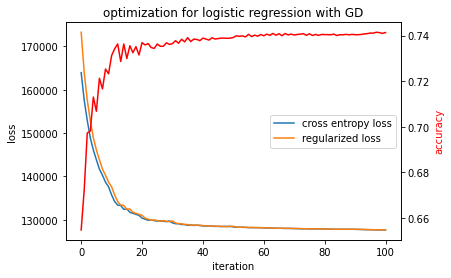

In [64]:
w_logistic_penalized = logistic_regression_penalized_gradient_descent(
    y_log, tX, max_iter=101, lambda_=0, isplot=True)


# w_logistic_penalized = logistic_regression_penalized_gradient_descent(
#     y_log, tX, max_iter=101, lambda_=0.1, isplot=True)
# print("L2 norm of weight = {}".format(np.linalg.norm(w_logistic_penalized, 2)))

# Evaluation

In [113]:
k_fold = 5
gamma_range = np.logspace(-5, 0, 10)
tr_losses = []
te_losses = []
accrs = []
for gamma in gamma_range:
    tr_loss, te_loss, accr = cv_eval(y_log, tX_poly, k_fold, logistic_regression_penalized_gradient_descent, gamma=gamma, max_iter=301)
    print("cross validation on {} fold, train loss {}, test loss {}, accuracy {:.2%}".format(k_fold, tr_loss, te_loss, accr))
    tr_losses.append(tr_loss)
    te_losses.append(te_loss)
    accrs.append(accr)



Begin training on fold 0
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 138352.70276414175
Current iteration=200, regularized loss: 138323.25999862328
Current iteration=300, regularized loss: 138320.10168874878
final regularized loss=138320.10168874878
min regularized loss=138320.10168874878
accuracy 0.65816
Begin training on fold 1
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 138353.280419353
Current iteration=200, regularized loss: 138323.8914971388
Current iteration=300, regularized loss: 138320.73886737673
final regularized loss=138320.73886737673
min regularized loss=138320.73886737673
accuracy 0.6577
Begin training on fold 2
Current iteration=0, regularized loss: 138629.43611198937
Current iteration=100, regularized loss: 138351.53575058634
Current iteration=200, regularized loss: 138321.97895297973
Current iteration=300, regularized loss: 138318.80848010533
final regularized

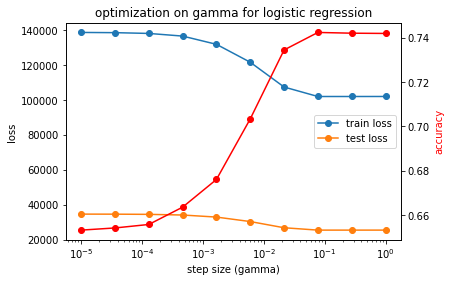

In [66]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(gamma_range, tr_losses, 'o-', label='train loss')
ax1.plot(gamma_range, te_losses, 'o-', label='test loss')
ax2.plot(gamma_range, accrs, 'o-', label='accuracy', color='r')
ax1.set_xscale('log')

plt.title('optimization on gamma for logistic regression')
ax1.set_xlabel('step size (gamma)')
ax2.set_ylabel('accuracy', color='r')
ax1.set_ylabel('loss')
ax1.legend(loc='center right')
# ax2.legend()
plt.savefig("CV_gamma_logistic")
plt.show()

In [7]:
k_fold = 5
degree_range = np.arange(2, 5)
tr_losses = []
te_losses = []
accrs = []
for deg in degree_range:
    train_x = build_poly(raw_X, deg)
    train_x = add_shift(train_x)
    tr_loss, te_loss, accr = cv_eval(y_log, train_x, k_fold, logistic_regression_penalized_gradient_descent, gamma=0.1, max_iter=301)
    print("cross validation on {} fold, train loss {}, test loss {}, accuracy {:.2%}".format(k_fold, tr_loss, te_loss, accr))
    tr_losses.append(tr_loss)
    te_losses.append(te_loss)
    accrs.append(accr)

Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 87924.6000115907
Current iteration=200, regularized loss: 86451.57913664133
Current iteration=300, regularized loss: 86365.32253158352
final regularized loss=86365.32253158352
min regularized loss=86365.32253158352
accuracy 0.80524
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 87577.19337954072
Current iteration=200, regularized loss: 86401.00779395776
Current iteration=300, regularized loss: 86314.54786690288
final regularized loss=86314.54786690288
min regularized loss=86314.54786690288
accuracy 0.806115
Current iteration=0, regularized loss: 138629.43611198937
Current iteration=100, regularized loss: 87682.27282918952
Current iteration=200, regularized loss: 86295.3407977602
Current iteration=300, regularized loss: 86204.93435603907
final regularized loss=86204.93435603907
min regularized loss=86204.93435603907
accuracy 0.805965
Curr

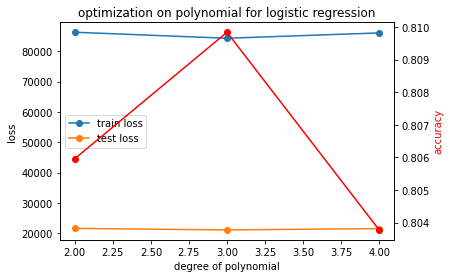

In [10]:
degree_range = np.arange(2, 5)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(degree_range, tr_losses, 'o-', label='train loss')
ax1.plot(degree_range, te_losses, 'o-', label='test loss')
ax2.plot(degree_range, accrs, 'o-', label='accuracy', color='r')
# ax1.set_xscale('log')

plt.title('optimization on polynomial for logistic regression')
ax1.set_xlabel('degree of polynomial')
ax2.set_ylabel('accuracy', color='r')
ax1.set_ylabel('loss')
ax1.legend(loc='center left')
# ax2.legend()
plt.savefig("CV_degree_logistic", dpi=300)
plt.show()

In [22]:
# find best lambda

lambdas = np.logspace(-2, 10, 5)
k_fold = 5
tr_losses = []
te_losses = []
accrs = []
print(tX_poly.shape)
for lambda_ in lambdas:
    print('Cross validation with lambda: {}'.format(lambda_))
    loss_tr, loss_te, accr = cv_eval(y_log, tX_poly, k_fold, logistic_regression_penalized_gradient_descent, lambda_=lambda_, gamma=0.5, max_iter=301)
    tr_losses.append(loss_tr)
    te_losses.append(loss_te)
    accrs.append(accr)



(250000, 67)
Cross validation with lambda: 0.01
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 127863.6923698303
Current iteration=200, regularized loss: 88109.50562875987
Current iteration=300, regularized loss: 84921.4237499681
final regularized loss=84921.4237499681
min regularized loss=84921.4237499681
accuracy 0.807335
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 123220.64144463176
Current iteration=200, regularized loss: 87416.48340701833
Current iteration=300, regularized loss: 84293.5255377156
final regularized loss=84293.5255377156
min regularized loss=84293.5255377156
accuracy 0.808625
Current iteration=0, regularized loss: 138629.43611198937
Current iteration=100, regularized loss: 102828.99092398459
Current iteration=200, regularized loss: 87485.5950508783
Current iteration=300, regularized loss: 84423.97106487298
final regularized loss=84423.97106487298
min regularized

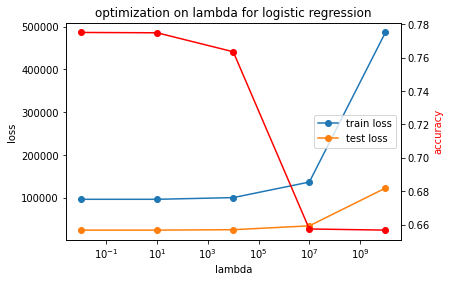

In [78]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(lambdas, tr_losses, 'o-', label='train loss')
ax1.plot(lambdas, te_losses, 'o-', label='test loss')
ax2.plot(lambdas, accrs, 'o-', label='accuracy', color='r')
ax1.set_xscale('log')

plt.title('optimization on lambda for logistic regression')
ax1.set_xlabel('lambda')
ax2.set_ylabel('accuracy', color='r')
ax1.set_ylabel('loss')
ax1.legend(loc='center right')
# ax2.legend()
plt.savefig("CV_lambda_logistic")
plt.show()


In [20]:
loss_tr, loss_te, accr = cv_eval(y_log, tX_poly, 5, logistic_regression_penalized_gradient_descent, lambda_=0, gamma=0.5, max_iter=301)
print(accr)

Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 127863.64390521578
Current iteration=200, regularized loss: 88157.60723275595
Current iteration=300, regularized loss: 84934.6981623525
final regularized loss=84934.6981623525
min regularized loss=84934.6981623525
accuracy 0.80756
Current iteration=0, regularized loss: 138629.43611198934
Current iteration=100, regularized loss: 123220.61064091817
Current iteration=200, regularized loss: 87416.43898948331
Current iteration=300, regularized loss: 84293.668168201
final regularized loss=84293.668168201
min regularized loss=84293.668168201
accuracy 0.808585
Current iteration=0, regularized loss: 138629.43611198937
Current iteration=100, regularized loss: 102828.95270368097
Current iteration=200, regularized loss: 87485.56033454338
Current iteration=300, regularized loss: 84423.7519574822
final regularized loss=84423.7519574822
min regularized loss=84423.7519574822
accuracy 0.807255
Current ite

## Prepare best model for submission

Current iteration=0, regularized loss: 173286.79513998673
Current iteration=100, regularized loss: 135379.9663705417
Current iteration=200, regularized loss: 110211.75597005934
Current iteration=300, regularized loss: 106245.40802477964
Current iteration=400, regularized loss: 105922.44728016286
Current iteration=500, regularized loss: 105890.11811579394
final regularized loss=105890.11811579394
min regularized loss=105890.11811579394
accuracy 0.807948
L2 norm of weight = 2.4905981971245583


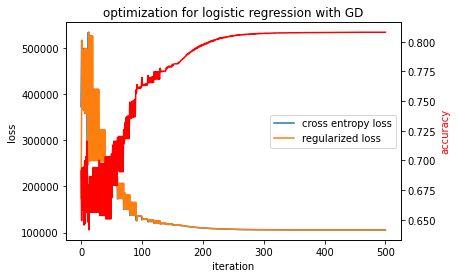

In [21]:
# tX_poly = build_poly(tX[:,1:], 3)
# tX_poly = add_shift(tX_poly)
# tX_test_poly = build_poly(tX_test[:,1:], 3)
# tX_test_poly = add_shift(tX_test_poly)
w_logistic_penalized = logistic_regression_penalized_gradient_descent(
    y_log, tX_poly, max_iter=501, lambda_=0., gamma=0.5, isplot=True)
print("L2 norm of weight = {}".format(np.linalg.norm(w_logistic_penalized, 2)))

## Generate predictions and save ouput in csv format for submission:

In [12]:
# for logistic regression
OUTPUT_PATH = './pred_reg_log_deg3.csv'
weights = w_logistic_penalized
y_pred = pred_logistic(tX_poly_test, weights, 0.5, for_submission=True)
# check validity
assert len(y_pred) == 568238
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 89 is different from 67)

In [16]:
tX_poly.shape

(250000, 89)

In [57]:
# for linear regression
OUTPUT_PATH = './pred_lst_degree10.csv'
y_pred = pred_linear(tX_deg10_test, w_opt_lst, 0)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [55]:
tX_deg10_test.shape

(568238, 221)